# Convolutional Neural Network

In [49]:
# 時間物件
import datetime
import time

# 資料處理
import pandas as pd

# 利用 pandas 將資料整理成表格
df = pd.read_csv('C:\\Users\\YUYU\\finlab_ml_course\\training_group1.csv', header=0,
                 index_col="Date",encoding= 'unicode_escape', delimiter=',')


# 資料處理

df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)
df.index = pd.to_datetime(df.index,format='%Y/%m/%d')
df = df.apply(lambda s: s.astype(str).str.replace(","," ").astype(float))

df.columns = df.columns.str.strip()
df

,TPE:1216
Date,
2016-07-04,64.5
2016-07-05,64.4
2016-07-06,63.6
2016-07-07,63.6
2016-07-11,65.1
...,...
2019-06-25,82.0
2019-06-26,81.4
2019-06-27,82.0


## 製作features

In [39]:
import numpy as np
cnn_x = []
cnn_y = []
indexes = []

time_period = 50


for i in range(0, len(df)-time_period-1-10, 3):
    xi = df.iloc[i:i+time_period]
    xi = (xi - xi.min()) / (xi.max() - xi.min())
    cnn_x.append(xi)
    
    yi = df.iloc[i+time_period-1+10] / df.iloc[i+time_period-1]
    cnn_y.append(yi)
    
    indexes.append(df.index[i+time_period-1])

cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexes)
indexes

array([Timestamp('2016-09-12 00:00:00'), Timestamp('2016-09-19 00:00:00'),
       Timestamp('2016-09-22 00:00:00'), Timestamp('2016-09-29 00:00:00'),
       Timestamp('2016-10-04 00:00:00'), Timestamp('2016-10-07 00:00:00'),
       Timestamp('2016-10-13 00:00:00'), Timestamp('2016-10-18 00:00:00'),
       Timestamp('2016-10-21 00:00:00'), Timestamp('2016-10-26 00:00:00'),
       Timestamp('2016-10-31 00:00:00'), Timestamp('2016-11-03 00:00:00'),
       Timestamp('2016-11-08 00:00:00'), Timestamp('2016-11-11 00:00:00'),
       Timestamp('2016-11-16 00:00:00'), Timestamp('2016-11-21 00:00:00'),
       Timestamp('2016-11-24 00:00:00'), Timestamp('2016-11-29 00:00:00'),
       Timestamp('2016-12-02 00:00:00'), Timestamp('2016-12-07 00:00:00'),
       Timestamp('2016-12-12 00:00:00'), Timestamp('2016-12-15 00:00:00'),
       Timestamp('2016-12-20 00:00:00'), Timestamp('2016-12-23 00:00:00'),
       Timestamp('2016-12-28 00:00:00'), Timestamp('2017-01-03 00:00:00'),
       Timestamp('2017-01

[1.06735751]


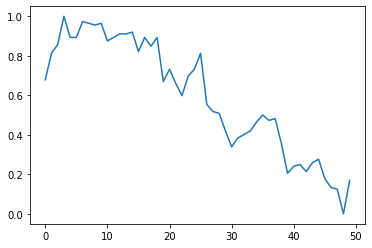

In [40]:
#神經網路辨識的圖
import matplotlib.pyplot as plt

#股價
plt.plot(cnn_x[1])
#漲幅
print(cnn_y[1])

## Reshape features and labels

In [41]:

cnn_x = cnn_x.reshape(len(cnn_x), time_period, 1)
cnn_y = cnn_y.reshape(len(cnn_y), 1)
cnn_x.shape

(223, 50, 1)

## Split traning and testing data

In [43]:
import datetime
cnn_x_train = cnn_x[indexes < datetime.datetime(2018,7,1)]
cnn_y_train = cnn_y[indexes < datetime.datetime(2018,7,1)]

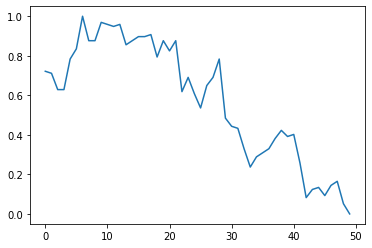

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cnn_x[0].reshape(1, len(cnn_x[0]))[0])


## CNN

In [45]:
import keras.layers as layers
import keras
from keras.models import Sequential
from keras.initializers import he_normal

input_shape = cnn_x[0].shape
time_period = 50
num_classes = 1


model_m = Sequential()

model = keras.Sequential()

model.add(layers.Conv1D(filters=5, kernel_size=3, activation='relu', input_shape=cnn_x[0].shape))
model.add(layers.AveragePooling1D(5))

model.add(layers.Conv1D(filters=5, kernel_size=3, activation='relu'))
model.add(layers.AveragePooling1D(5))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=1, ))#activation = 'softmax'))

adam = keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='mse',
                optimizer=adam,metrics=['accuracy'])

print(model.summary())

history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=50,
                    epochs=60,
                    verbose=1,
                    validation_split=0.1, )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 48, 5)             20        
_________________________________________________________________
average_pooling1d_10 (Averag (None, 9, 5)              0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 7, 5)              80        
_________________________________________________________________
average_pooling1d_11 (Averag (None, 1, 5)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               720       
_________________________________________________________________
dense_8 (Dense)              (None, 84)                10164     
__________

In [46]:
history.history['loss']

[1.0257676564730132,
 0.9973783722290626,
 0.9668561953764695,
 0.9387190250250009,
 0.9127312806936411,
 0.887415335728572,
 0.863537270289201,
 0.8402446187459506,
 0.817933453963353,
 0.7958092414415799,
 0.7738103087131794,
 0.7517612943282495,
 0.729304341169504,
 0.7067173765255854,
 0.6841227045426002,
 0.6612874957231375,
 0.6385898773486798,
 0.615816396016341,
 0.5931616929861215,
 0.5706645983916062,
 0.5482264390358558,
 0.5259904036155114,
 0.504037808913451,
 0.48235422372817993,
 0.4610627843783452,
 0.43988460073104274,
 0.419250121483436,
 0.3989996910095215,
 0.3791551681665274,
 0.35979339938897353,
 0.340902709043943,
 0.32250781471912676,
 0.30468779573073757,
 0.28733847920711225,
 0.27063512343626756,
 0.2544519809576181,
 0.23893549923713392,
 0.22397636335629684,
 0.20958847036728492,
 0.19583166104096633,
 0.1826967138510484,
 0.1701639065375695,
 0.15814482821868017,
 0.14685038075997278,
 0.13607364205213693,
 0.1259803153001345,
 0.11646784154268411,
 0.107

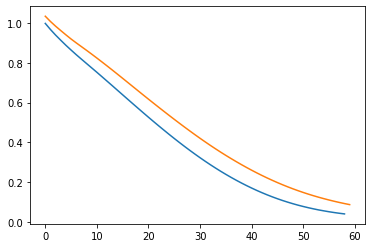

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])

<AxesSubplot:>

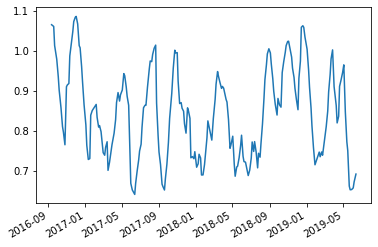

In [48]:
ey = model.predict(cnn_x)
ey = pd.Series(ey.swapaxes(0, 1)[0], index=indexes)
%matplotlib inline
ey.plot()

<AxesSubplot:>

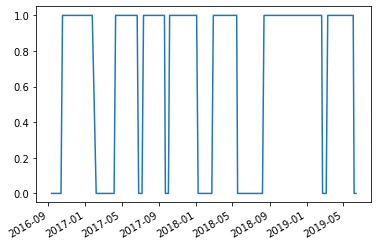

In [25]:
((ey > 1.0000000001).rolling(8).sum() >0).astype(int).plot()

<AxesSubplot:>

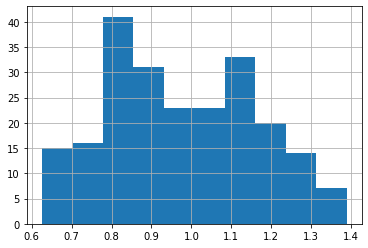

In [26]:
ey.hist()

In [50]:

eq = df[pd.to_datetime(indexes)]
gain = (eq.shift(-1) - eq) 

signal = (ey > ey.quantile(0.9)).rolling(20).sum() > 0
eq = (gain[signal])['2018':].cumsum()
eq.plot()

KeyError: "None of [DatetimeIndex(['2016-09-12', '2016-09-19', '2016-09-22', '2016-09-29',\n               '2016-10-04', '2016-10-07', '2016-10-13', '2016-10-18',\n               '2016-10-21', '2016-10-26',\n               ...\n               '2019-05-03', '2019-05-08', '2019-05-13', '2019-05-16',\n               '2019-05-21', '2019-05-24', '2019-05-29', '2019-06-03',\n               '2019-06-06', '2019-06-12'],\n              dtype='datetime64[ns]', length=223, freq=None)] are in the [columns]"

In [369]:
signal = (ey > 1.0000000001).rolling(8).sum() >0
output = signal['2018-07-01':'2018-12-01']
output


2018-07-02     True
2018-07-05     True
2018-07-10     True
2018-07-13     True
2018-07-18    False
2018-07-23    False
2018-07-26    False
2018-07-31    False
2018-08-03    False
2018-08-08    False
2018-08-13    False
2018-08-16    False
2018-08-21    False
2018-08-24    False
2018-08-29    False
2018-09-03    False
2018-09-06    False
2018-09-11    False
2018-09-14     True
2018-09-19     True
2018-09-25     True
2018-09-28     True
2018-10-03     True
2018-10-08     True
2018-10-12     True
2018-10-17     True
2018-10-22     True
2018-10-25     True
2018-10-30     True
2018-11-02     True
2018-11-07     True
2018-11-12     True
2018-11-15     True
2018-11-20     True
2018-11-23     True
2018-11-28     True
dtype: bool

In [340]:
signal['2018':].astype(int).diff().abs().sum()

1976